# Pfizer Vaccine Tweets Data Exploration
Add an introductory markdown cell with a title (header) and paragraph that describes what you are doing

## Importing Dataset

* Since this Pfizer Vaccine Tweets dataset is continually updating, we want to pull the dataset directly from Kaggle using the provided API.
* To use the Kaggle API, you need to do the following:
    * Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens.
    * Click on Create New API Token - It will download kaggle.json file on your machine.
    * now just put it in the location C:\Users\(your user name)\.kaggle.

In [4]:
pip install kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
api = KaggleApi()
api.authenticate()
api.dataset_download_files('gpreda/pfizer-vaccine-tweets')

## Access the dataset you just download.

In [5]:
zf = ZipFile('pfizer-vaccine-tweets.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

## Import nessasery tools like Pandas.

In [6]:
import pandas as pd

## Exploratory Analysis

### Load the dataset

In [7]:
df_tweets=pd.read_csv('vaccination_tweets.csv')

### Figuring out the amount of data we have.

In [8]:
df_tweets.shape

(3945, 16)

Last time I ran this cell gives me (3683, 16), which is 3683 rows and 16 columns.
The number of rows may increase due to update.

### Checking the first  and last 5 rows to have a better understanding.

In [9]:
df_tweets.info

<bound method DataFrame.info of                        id                  user_name  \
0     1340539111971516416                 Rachel Roh   
1     1338158543359250433                Albert Fong   
2     1337858199140118533                   eli🇱🇹🇪🇺👌   
3     1337855739918835717              Charles Adler   
4     1337854064604966912       Citizen News Channel   
...                   ...                        ...   
3940  1348563660046667778                      Carla   
3941  1348559431789916161       Simon Hodes ⬅️2m➡️ 😷   
3942  1348553837276258305           Langata Hospital   
3943  1348552966605836289            Dean McLaughlin   
3944  1348545969156206597  Iranian Community Romania   

                       user_location  \
0          La Crescenta-Montrose, CA   
1                  San Francisco, CA   
2                           Your Bed   
3             Vancouver, BC - Canada   
4                                NaN   
...                              ...   
3940      Marik

This cell gives a messy output of the first 5 and last 5 rows.

### To have a neater layput, we use the head() method.

In [10]:
df_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


Now we have the first 5 rows of the dataset in a much neater manner.

### We want to see the distribution of users' followers.

<AxesSubplot:>

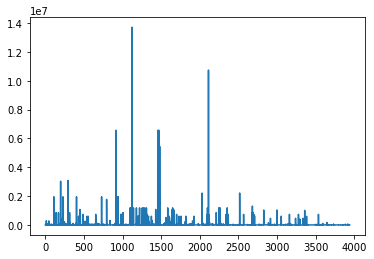

In [11]:
df_tweets['user_followers'].plot()

This will return a histogram of follower number.

### We are also interested in the means of users accessing social media.

In [12]:
df_tweets['source'].value_counts()

Twitter for iPhone                 1424
Twitter Web App                    1171
Twitter for Android                 894
TweetDeck                           229
Twitter for iPad                    102
Buffer                               34
Instagram                            22
Hootsuite Inc.                       16
Nonli                                 6
LinkedIn                              5
Microsoft Power Platform              5
SocialFlow                            5
24liveblog                            4
Twitter for Mac                       3
IFTTT                                 3
Twitter Media Studio                  2
GT_Backend                            2
Echobox                               2
Sendible                              2
Falcon Social Media Management        2
Twitter Media Studio - LiveCut        1
WordPress.com                         1
SocialNewsDesk                        1
Tweetbot for Mac                      1
Sprout Social                         1


This will give us the statistics of what method the users tweets. From the results, we can see iPhone users are the majority. Web app users and android users are slightly less than iPhone users, suggesting a possible bias of our data.

## Data Cleaning

### Cleaning unnessasery cloumns

In [13]:
df_tweets.drop(columns=['id','user_name','user_description','hashtags'], inplace=True)
df_tweets

,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,retweets,favorites,is_retweet
0,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,Twitter for Android,0,0,False
1,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,Twitter Web App,1,1,False
2,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Twitter for Android,0,0,False
3,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",Twitter Web App,446,2129,False
4,NaN,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3940,"Marikina City, Philippines",2009-11-23 12:14:59,136,98,514,False,2021-01-11 09:33:26,Why are you gonna settle for anything less if ...,Twitter for iPhone,0,1,False
3941,"GP Partner, Watford",2014-07-28 13:32:12,2228,2551,22068,False,2021-01-11 09:16:38,@eddwilson @Olivers_Aunty @paul_astell @nadhim...,Twitter Web App,0,1,False
3942,"Nairobi, Kenya",2011-10-10 14:28:59,101,48,525,False,2021-01-11 08:54:24,The @WHO has listed the #PfizerBioNTech Covid-...,Twitter Web App,0,1,False
3943,"County Derry, Northern Ireland",2011-11-07 01:28:02,7582,7425,35652,False,2021-01-11 08:50:56,From the @healthdpt this morning re: the #Pfiz...,Twitter for Android,0,0,False


Now we are only left with 12 column variables.

### Noiw we want to know more about the iPhone users

In [14]:
df_tweets.query("source == 'Twitter for iPhone'")

,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,retweets,favorites,is_retweet
4,NaN,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,Twitter for iPhone,0,0,False
5,"Birmingham, England",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,Twitter for iPhone,0,0,False
7,NaN,2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,Twitter for iPhone,2,22,False
13,NaN,2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 17:19:02,For all the women and healthcare providers who...,Twitter for iPhone,48,82,False
15,"London, England",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 16:00:38,Trump announces #vaccine rollout 'in less than...,Twitter for iPhone,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3927,Washington D.C.,2016-11-27 15:12:46,93,444,20800,False,2021-01-11 12:13:14,"I don’t know about “anything,” but I’m ready f...",Twitter for iPhone,0,2,False
3936,Leeds,2010-12-27 22:04:13,209,151,251,False,2021-01-11 10:05:47,A triumph for science and collaboration! #Pfiz...,Twitter for iPhone,0,9,False
3938,"Cork, Ireland",2020-02-24 19:17:47,111,213,2025,False,2021-01-11 09:55:14,So happy to receive my #COVIDVaccination I can...,Twitter for iPhone,26,469,False
3939,Vancouver,2009-01-23 08:36:24,5257,5010,23562,False,2021-01-11 09:36:16,#cdnpoli No ordinary Joe. President Biden will...,Twitter for iPhone,27,85,False
